In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import scipy.stats as st

In [3]:
house_rates = Path("US House Price and Mortgage Rate.csv")
house_rates_pd = pd.read_csv(house_rates)
house_rates_pd["Month"] = pd.to_datetime(house_rates_pd["Month"]).dt.strftime('%Y-%m-%d')
house_rates_pd.head()

/var/folders/3s/_lmcnpzd4dgdh5qgj6hxk9lw0000gn/T/ipykernel_70745/3244132211.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  house_rates_pd["Month"] = pd.to_datetime(house_rates_pd["Month"]).dt.strftime('%Y-%m-%d')


,Month,FHFA House Price Index,Consumer Price Index,Mortgage Rate (30-Year Fixed)
0,2012-01-01,178.34,226.665,3.92
1,2012-02-01,178.74,227.663,3.89
2,2012-03-01,180.33,229.392,3.95
3,2012-04-01,181.24,230.085,3.91
4,2012-05-01,182.33,229.815,3.80


In [4]:
annual_factors = Path("Annual_Macroeconomic_Factors.csv")
annual_factors_pd = pd.read_csv(annual_factors)
annual_factors_pd = annual_factors_pd.set_index("Date")
annual_factors_pd.head()

,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
Date,,,,,,,,
1975-01-01,61.0900,67.14653,65.30488,0.98599,8.46667,5648.462,9.04712,19908.0
1976-01-01,65.5250,79.96264,69.05653,0.95022,7.71667,5952.809,8.86585,20346.0
1977-01-01,73.4350,78.82540,73.54636,1.00577,7.06667,6228.076,8.84519,20780.0
1978-01-01,83.7450,78.84679,79.15866,1.05957,6.06667,6572.819,9.64173,21497.0
1979-01-01,95.1325,85.63207,88.06755,1.10358,5.83333,6780.924,11.20365,21672.0


In [5]:
monthly_factors = Path("Monthly_Macroeconomic_Factors.csv")
monthly_factors_pd = pd.read_csv(monthly_factors)
monthly_factors_pd = monthly_factors_pd.set_index("Date")
monthly_factors_pd.head()

,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
Date,,,,,,,,
1987-01-01,63.735,14.97068,46.91647,153968000.0,6.6,2.41735,9.2040,6159.5
1987-02-01,64.134,15.86818,47.08523,154123000.0,6.6,4.57724,9.0825,6192.1
1987-03-01,64.470,16.48206,47.29619,154229000.0,6.6,3.87276,9.0350,6200.0
1987-04-01,64.974,16.22884,47.54933,154362000.0,6.3,4.83973,9.8325,5967.2
1987-05-01,65.549,16.14232,47.71810,154490000.0,6.3,4.51565,10.5960,6209.1


In [6]:
housing_factors = Path("Housing_Macroeconomic_Factors_US (2).csv")
housing_factors_pd = pd.read_csv(housing_factors)
housing_factors_pd = housing_factors_pd.set_index("Date")
housing_factors_pd.head()

,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai
Date,,,,,,,,,,,,
1987-01-01,63.965,241857,6.0,99.902813,9.2040,70.163085,1690.0,100.0,2.7439,100.4624,NaN,NaN
1987-02-01,64.424,242005,6.2,99.875864,9.0825,70.289205,1689.0,100.4,2.7475,100.4945,NaN,NaN
1987-03-01,64.735,242166,6.0,99.869734,9.0350,70.321678,1704.0,100.7,2.7537,100.5720,NaN,NaN
1987-04-01,65.132,242338,6.0,99.882087,9.8325,70.499062,1601.0,101.1,2.7677,100.6568,NaN,NaN
1987-05-01,65.565,242516,6.7,99.910371,10.5960,70.808308,1500.0,101.3,2.7729,100.6919,NaN,NaN


MONTHLY DATA

In [7]:
Housing_mortgage_monthly_pd = pd.merge(housing_factors_pd,monthly_factors_pd, how= "left", on=["Date"])
Housing_mortgage_monthly_pd2= Housing_mortgage_monthly_pd.dropna()
Housing_mortgage_monthly_pd2.head()

,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
Date,,,,,,,,,,,,,,,,,,,,
1998-01-01,87.616,274732,4.0,99.994570,6.9940,73.705376,1555.0,137.3,4.0562,102.5385,2.16,10.024,87.164,49.92450,68.18076,172061000.0,4.6,4.31719,6.9940,8554.9
1998-02-01,88.004,274943,3.9,99.980549,7.0425,73.776106,1647.0,137.5,4.0889,102.7129,2.16,10.024,87.374,52.69964,68.30734,172244000.0,4.6,4.35249,7.0425,8608.9
1998-03-01,88.443,275175,4.1,99.975298,7.1275,73.798698,1605.0,137.5,4.1143,102.7210,2.16,10.024,87.878,55.52620,68.43391,172396000.0,4.7,3.53181,7.1275,8658.3
1998-04-01,88.879,275434,4.0,99.984454,7.1400,73.869665,1547.0,137.9,4.1402,102.6981,2.03,9.668,88.558,57.24488,68.56048,172553000.0,4.3,3.48908,7.1400,8685.6
1998-05-01,89.365,275700,3.9,100.013988,7.1440,73.880942,1554.0,137.6,4.1644,102.5923,2.03,9.668,89.374,56.88943,68.68706,172750000.0,4.4,4.02785,7.1440,8721.1


In [195]:
# #GDP, Mortgage rate line graph 2 graphs-annual and monthly
# x_axis = Housing_mortgage_monthly_pd2['gdp']
# y_axis = Housing_mortgage_monthly_pd2['mortgage_rate']
# plt.scatter(x_axis, y_axis)
# plt.xlabel("GDP")
# plt.ylabel("Mortgage Rate")
# plt.title("GDP vs. Mortgage Rate (1998-2022)(Monthly)")

# plt.show()



GDP VS. MORTGAGE RATE (MONTHLY)

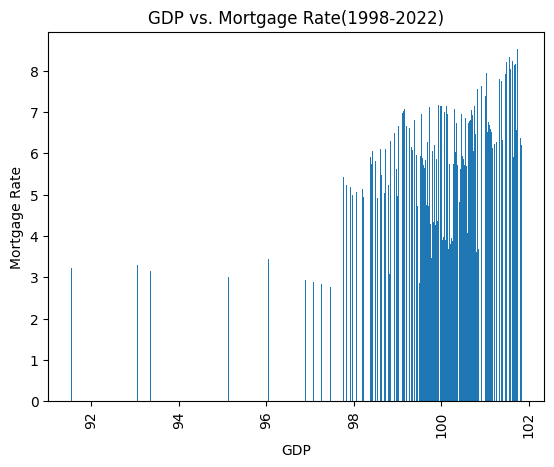

In [8]:
x_axis = Housing_mortgage_monthly_pd2['gdp']
y_axis = Housing_mortgage_monthly_pd2['mortgage_rate']
plt.bar(x_axis, y_axis, width=0.02)
plt.xlabel("GDP")
plt.xticks(rotation=90)
plt.ylabel("Mortgage Rate")
plt.title("GDP vs. Mortgage Rate(1998-2022)")

plt.show()

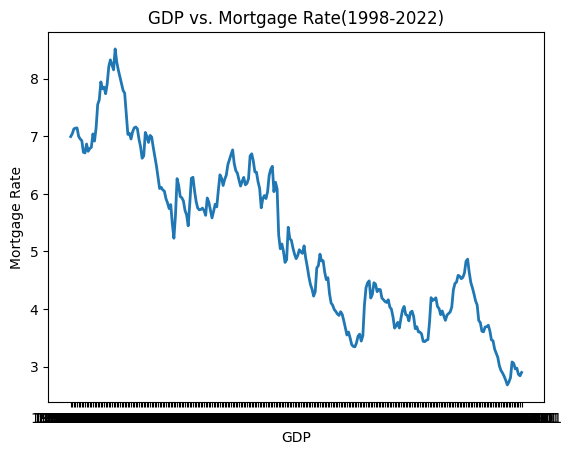

In [238]:
x_axis = Housing_mortgage_monthly_pd2['gdp']
y_axis = Housing_mortgage_monthly_pd2['mortgage_rate']
x_axis_array= np.array(['gdp'])
y_axis_arange= np.arange(10)


plt.plot(y_axis,linewidth= "2",)
plt.xlabel("GDP")
plt.ylabel("Mortgage Rate")
plt.title("GDP vs. Mortgage Rate(1998-2022)")
# plt.subplot(1,2,figsize=(6,2.5))
plt.show()

The correlation between gdp and mortgage rate is 0.4
The r-squared is: 0.158


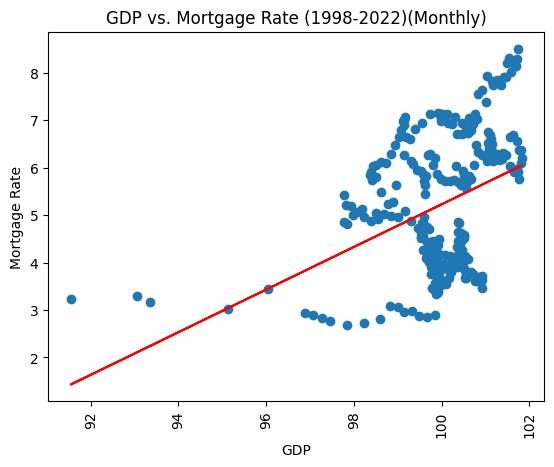

In [9]:
x_axis = Housing_mortgage_monthly_pd2['gdp']
y_axis = Housing_mortgage_monthly_pd2['mortgage_rate']

correlation = st.pearsonr(Housing_mortgage_monthly_pd2['gdp'],Housing_mortgage_monthly_pd2['mortgage_rate'])
print(f"The correlation between gdp and mortgage rate is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)= st.linregress(x_axis,y_axis)
regress_values= x_axis* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"


plt.plot(Housing_mortgage_monthly_pd2["gdp"], regress_values, "r-")
plt.annotate(line_eq,(0,200), fontsize=14)
plt.scatter(x_axis, y_axis)
plt.xlabel("GDP")
plt.xticks(rotation=90)
plt.ylabel("Mortgage Rate")
plt.title("GDP vs. Mortgage Rate (1998-2022)(Monthly)")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()

GDP VS. HOUSE PRICE INDEX (MONTHLY)

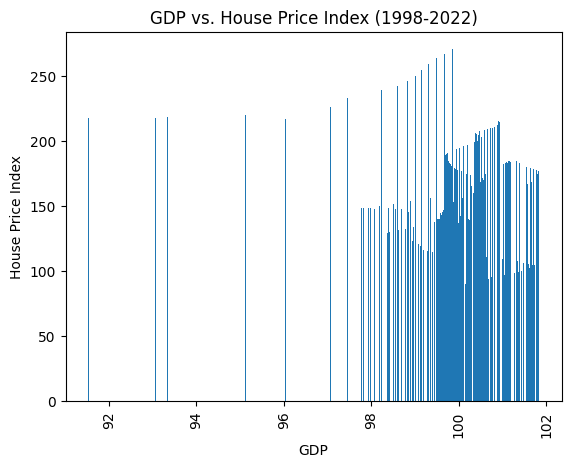

In [10]:
x_axis = Housing_mortgage_monthly_pd2['gdp']
y_axis = Housing_mortgage_monthly_pd2['house_price_index']
plt.bar(x_axis, y_axis,width= 0.02)
plt.xlabel("GDP")
plt.xticks(rotation=90)
plt.ylabel("House Price Index")
plt.title("GDP vs. House Price Index (1998-2022)")

plt.show()

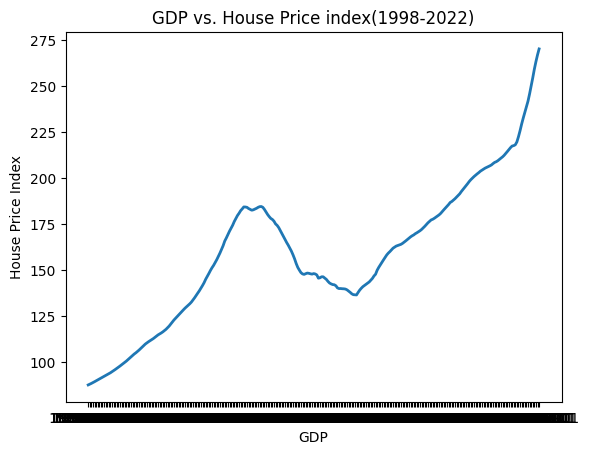

In [11]:
x_axis = Housing_mortgage_monthly_pd2['gdp']
y_axis = Housing_mortgage_monthly_pd2['house_price_index']
x_axis_array= np.array(['gdp'])
plt.plot(y_axis,linewidth= "2")
plt.xlabel("GDP")
plt.ylabel("House Price Index")
plt.title("GDP vs. House Price index(1998-2022)")

plt.show()

The correlation between gdp and house price is -0.17
The r-squared is: -0.338


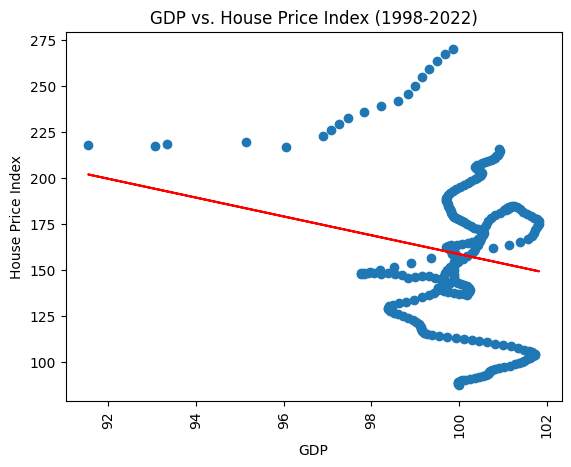

In [12]:
x_axis = Housing_mortgage_monthly_pd2['gdp']
y_axis = Housing_mortgage_monthly_pd2['house_price_index']

correlation = st.pearsonr(Housing_mortgage_monthly_pd2['gdp'],Housing_mortgage_monthly_pd2['house_price_index'])
print(f"The correlation between gdp and house price is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)= st.linregress(x_axis,y_axis)
regress_values= x_axis* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"


plt.plot(Housing_mortgage_monthly_pd2["gdp"], regress_values, "r-")
plt.annotate(line_eq,(0,200), fontsize=12)
plt.scatter(x_axis, y_axis)
plt.xlabel("GDP")
plt.xticks(rotation=90)
plt.ylabel("House Price Index")
plt.title("GDP vs. House Price Index (1998-2022)")
print(f"The r-squared is: {round(rvalue*2,3)}")
plt.show()

ANNUAL DATA 

In [13]:
Housing_mortgage_annual_pd = pd.merge(housing_factors_pd,annual_factors_pd, how= "left", on=["Date"])
Housing_mortgage_annual_pd2= Housing_mortgage_annual_pd.dropna()
Housing_mortgage_annual_pd2.head()

,house_price_index,population,house_supply,gdp,mortgage_rate,employment_rate,permit_new,ppi_res,m3,cci,delinquency_rate,hcai,House_Price_Index,Stock_Price_Index,Consumer_Price_Index,Population,Unemployment_Rate,Real_GDP,Mortgage_Rate,Real_Disposable_Income
Date,,,,,,,,,,,,,,,,,,,,
1998-01-01,87.616,274732,4.0,99.994570,6.9940,73.705376,1555.0,137.3,4.0562,102.5385,2.16,10.024,211.4625,807.92623,197.80564,1.16571,4.50833,12045.824,6.94264,31712.0
1999-01-01,93.209,277891,3.9,100.653042,6.7850,74.084227,1732.0,137.9,4.4026,102.2202,1.90,12.709,221.8700,909.09200,202.13368,1.14834,4.21667,12623.361,7.44000,32409.0
2000-01-01,100.552,281083,4.3,101.488638,8.2100,74.262948,1727.0,142.4,4.6662,102.9214,1.95,17.087,236.0700,944.83957,208.95945,1.11277,3.99167,13138.035,8.05346,33645.0
2001-01-01,109.846,283960,3.8,100.817373,7.0325,73.975026,1699.0,140.3,4.9757,101.1086,2.28,16.253,253.7250,889.34864,214.86500,0.98974,4.73333,13263.417,6.96788,34216.0
2002-01-01,117.143,286739,4.2,99.145833,6.9975,72.016936,1665.0,140.3,5.4541,100.5686,2.21,15.739,269.7950,775.06492,218.27283,0.92780,5.77500,13488.357,6.53731,34894.0


GDP VS. MORTGAGE RATE (ANNUAL)

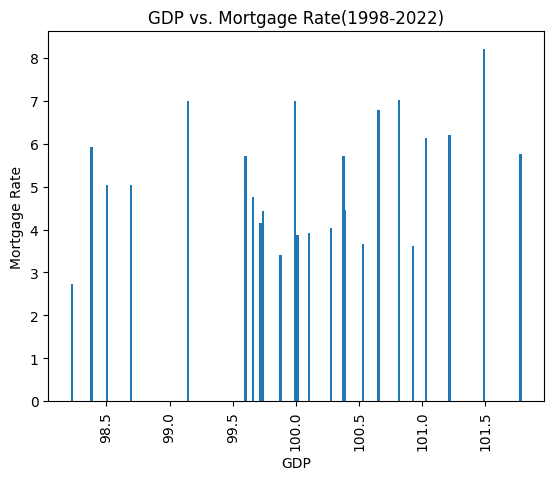

In [14]:
x_axis = Housing_mortgage_annual_pd2['gdp']
y_axis = Housing_mortgage_annual_pd2['mortgage_rate']
plt.bar(x_axis, y_axis, width=0.02)
plt.xlabel("GDP")
plt.xticks(rotation=90)
plt.ylabel("Mortgage Rate")
plt.title("GDP vs. Mortgage Rate(1998-2022)")

plt.show()

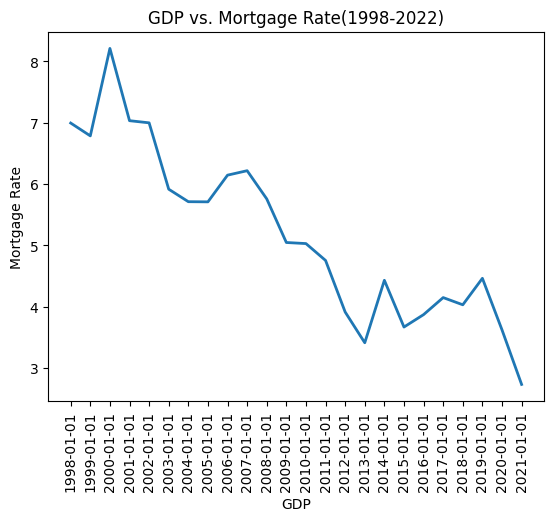

In [15]:
x_axis = Housing_mortgage_annual_pd2['gdp']
y_axis = Housing_mortgage_annual_pd2['mortgage_rate']
x_axis_array= np.array(['gdp'])
plt.plot(y_axis,linewidth= "2",)
plt.xlabel("GDP")
plt.xticks(rotation=90)
plt.ylabel("Mortgage Rate")
plt.title("GDP vs. Mortgage Rate(1998-2022)")

plt.show()

The correlation between gdp and mortgage rate is 0.32
The r-squared is: 0.649


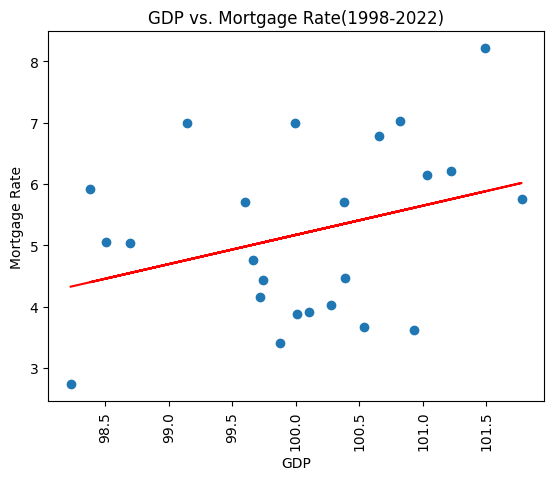

In [16]:
x_axis = Housing_mortgage_annual_pd2['gdp']
y_axis = Housing_mortgage_annual_pd2['mortgage_rate']

correlation = st.pearsonr(Housing_mortgage_annual_pd2['gdp'],Housing_mortgage_annual_pd2['mortgage_rate'])
print(f"The correlation between gdp and mortgage rate is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)= st.linregress(x_axis,y_axis)
regress_values= x_axis* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.plot(Housing_mortgage_annual_pd2["gdp"], regress_values, "r-")
plt.annotate(line_eq,(0,200), fontsize=12)
plt.scatter(x_axis, y_axis)
plt.xlabel("GDP")
plt.xticks(rotation=90)
plt.ylabel("Mortgage Rate")
plt.title("GDP vs. Mortgage Rate(1998-2022)")
print(f"The r-squared is: {round(rvalue*2,3)}")
plt.show()

GDP VS. HOUSE PRICE INDEX (ANNUAL)

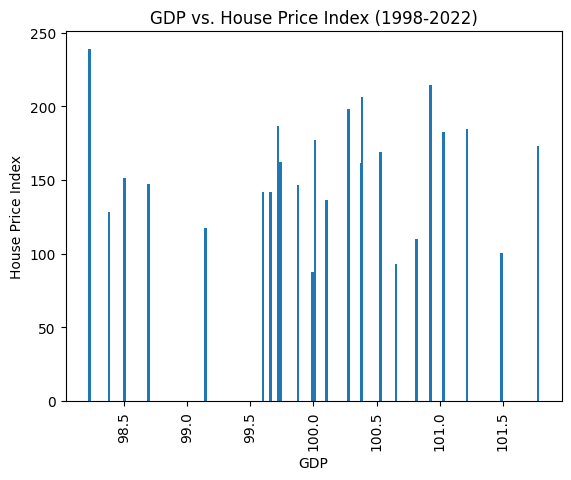

In [17]:
x_axis = Housing_mortgage_annual_pd2['gdp']
y_axis = Housing_mortgage_annual_pd2['house_price_index']
plt.bar(x_axis, y_axis,width= 0.02)
plt.xlabel("GDP")
plt.xticks(rotation=90)
plt.ylabel("House Price Index")
plt.title("GDP vs. House Price Index (1998-2022)")

plt.show()

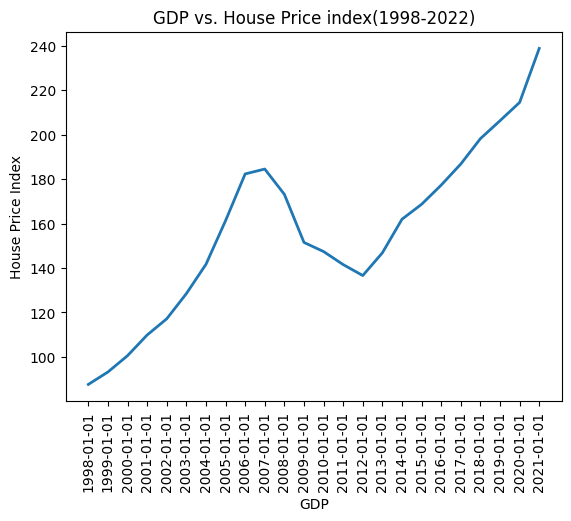

In [18]:
x_axis = Housing_mortgage_annual_pd2['gdp']
y_axis = Housing_mortgage_annual_pd2['house_price_index']
x_axis_array= np.array(['gdp'])
plt.plot(y_axis,linewidth= "2")
plt.xlabel("GDP")
plt.xticks(rotation=90)
plt.ylabel("House Price Index")
plt.title("GDP vs. House Price index(1998-2022)")

plt.show()

The correlation between gdp and house price is -0.03
The r-squared is: -0.061


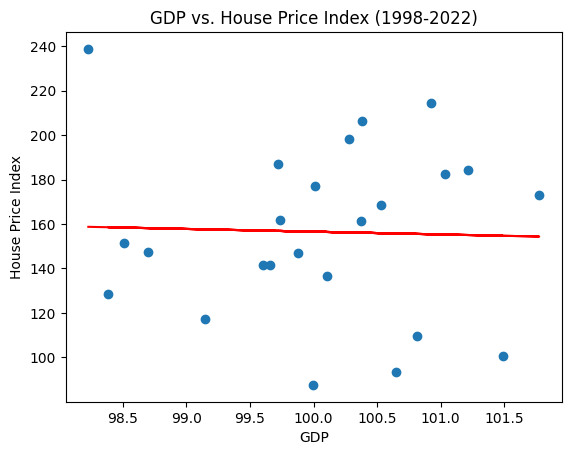

In [19]:
x_axis = Housing_mortgage_annual_pd2['gdp']
y_axis = Housing_mortgage_annual_pd2['house_price_index']

correlation = st.pearsonr(Housing_mortgage_annual_pd2['gdp'],Housing_mortgage_annual_pd2['house_price_index'])
print(f"The correlation between gdp and house price is {round(correlation[0],2)}")

(slope, intercept,rvalue, pvalue, stderr)= st.linregress(x_axis,y_axis)
regress_values= x_axis* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"


plt.plot(Housing_mortgage_annual_pd2["gdp"], regress_values, "r-")
plt.annotate(line_eq,(0,200), fontsize=12)
plt.scatter(x_axis, y_axis)
plt.xlabel("GDP")
plt.ylabel("House Price Index")
plt.title("GDP vs. House Price Index (1998-2022)")
print(f"The r-squared is: {round(rvalue*2,3)}")
plt.show()